# <center> École des Ponts ParisTech</center>
## <center> SPH pour l'hydraulique </center>
### <center> Projet SPH GMM 2021</center>
#### <center> Parois mobiles  </center>
<center> Ruben Persicot & Yohan Lanier </center>


<center> Encadrants : Rémi Carmigniani et Damien Violeau </center>

On commence par importer les différents fichiers utiles pour implémenter le solveur SPH

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from sys import exit
import os.path
from os import path
import csv
import time
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex'] = True
from src.spyh import *
from src.checkTD3 import *
from src.sphvar import *
from src.plotParticles import *
from src.state import *
from src.contrib import *
from src.analytical_solutions import *

Définition des paramètres

In [2]:
#GEOMETRIC PARAMETERS
L = 1 #m
U = 1 # Upper bound velocity
Re = 1
#FLUID PARAMETERS
rhoF = 1000
c0 = 40
mu = rhoF*U*L/Re #(Pa.s)
grav = np.array([0.0, -9.81]) #m.s-2
gamma = 7
B = rhoF*c0**2/gamma 
#DENSITY & SHEPARD THRESHOLDS : 
shepardMin = 10**(-6)
rhoMin = 0.5*rhoF
rhoMax = 1.5*rhoF

In [3]:
#PARTICLES & SPACES PARAMETERS : 
dr = L/40
h = smthfc*dr
m=dr*dr*rhoF
lspace = 2*h
print(lspace)
#COMPUTATION DOMAIN : 
xOrigin = 0
yOrigin = 0
xSize = L + 2*nBound*dr
ySize = L+2*nBound*dr
xMax = xOrigin+xSize
yMax = yOrigin+ySize

0.1


Les FLAGs sont définis dans le fichier [src/sphvar.py](src/sphvar.py)

Les murs seront composés d'une couche de *nBound =4* particules *fictives*. Ce nombre est suffisant pour éviter la pénétration du mur.

Pour ajouter des particules au tableau *part*, utilisez la fonction *addBox* :

```python
part = addBox(part,[x_0,y_0,L_x,L_y],FLAG,dr,rhoF)
```

cette commande ajoute à part des particules de type FLAG dans le domaine rectangulaire : $\left[x_0,x_0+L_x\right]\times\left[y_0,y_0+L_y\right]$

In [4]:
#INIT PART:
part = init_particles()
part = addBox(part,[0,0,xSize,nBound*dr],BOUND,dr,rhoF)
part = addBox(part,[0, nBound*dr, nBound*dr,L], BOUND, dr, rhoF)
part = addBox(part,[nBound*dr+L, nBound*dr, nBound*dr,L], BOUND, dr, rhoF)
part = addBox(part,[0, nBound*dr+L, xSize,nBound*dr], MOBILEBOUND, dr, rhoF)#mobile parts --> à voir si on fait un flag spécifique 

part = addBox(part,[nBound*dr,nBound*dr,L,L],FLUID,dr,rhoF)

In [5]:
len(part)

2304

On doit trouver 4624 particules

<IPython.core.display.Javascript object>


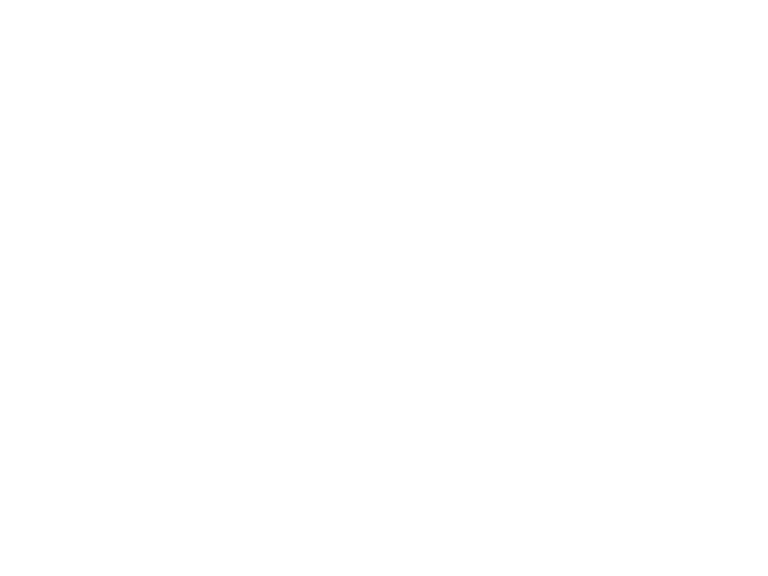

In [6]:
%matplotlib notebook
Umax= 1
tabUx = part[:,VEL[0]]
domain = [xOrigin,xMax,yOrigin,yMax,0,Umax]
plotPropertiesWithBound(part,tabUx,r'$U_x$',domain,dr,1)

In [7]:
vecPer = np.array([12*lspace,0])
posSpace,neibSpace,partSpace,listNeibSpace = init_spaces(xOrigin,yOrigin,xSize,ySize,lspace,dr)
plotSpaces(posSpace,'k',lspace,1)

In [8]:
part[:,VEL] = initMobileBoundVelocity((part[:,INFO]==MOBILEBOUND), part[:,VEL], U)

In [9]:
current_directory = os.getcwd()
case_directory = os.path.join(current_directory, r'Results/Cavity_'+time.strftime("%Y%m%d_%H%M%S"))
os.mkdir(case_directory)
data_directory = os.path.join(case_directory,r'Data')
figures_directory = os.path.join(case_directory,r'Figures')
os.mkdir(data_directory)
os.mkdir(figures_directory)

In [10]:
# Here we specify the output frequencies
dt_figure = 0.005
t_print = 0
#final time :
t_end = 3
t=0
it=0
im_count=0


[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
----------------------------
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
time :
0.00012195121951219515


<IPython.core.display.Javascript object>


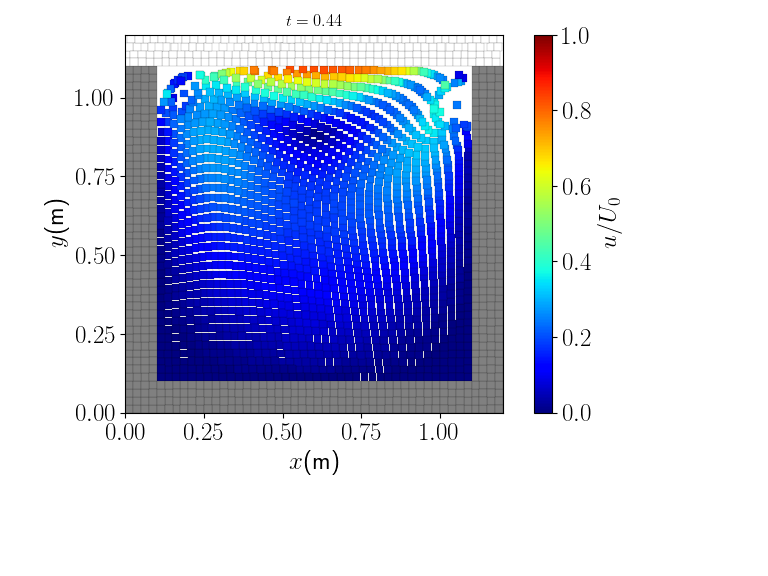

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11286295 1.1125    ]
 [1.137982   1.1875    ]
 [1.13786295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11286295 1.1125    ]
 [1.137982   1.1875    ]
 [1.13786295 1.1125    ]]
time :
0.00024099883855981422
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13822009 1.1875    ]
 [1.162982   1.1125    ]
 [1.137982   1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13822009 1.1875    ]
 [1.162982   1.1125    ]
 [1.137982   1.1125    ]]
time :
0.0003600464576074333
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16310105 1.1125    ]
 [1.13810105 1.1625    ]
 [1.13810105 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16917247 1.1875    ]
 [1.11917247 1.1875    ]
 [1.14095819 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16917247 1.1875    ]
 [1.11917247 1.1875    ]
 [1.14095819 1.1125    ]]
time :
0.003336236933797908
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11941057 1.1875    ]
 [1.19107724 1.1125    ]
 [1.14107724 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11941057 1.1875    ]
 [1.19107724 1.1125    ]
 [1.14107724 1.1125    ]]
time :
0.003455284552845527
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19119628 1.1125    ]
 [1.11619628 1.1625    ]
 [1.14119628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 .

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12464866 1.1875    ]
 [1.19369628 1.1125    ]
 [1.14369628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12464866 1.1875    ]
 [1.19369628 1.1125    ]
 [1.14369628 1.1125    ]]
time :
0.006074332171893151
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19381533 1.1125    ]
 [1.11881533 1.1625    ]
 [1.14381533 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19381533 1.1125    ]
 [1.11881533 1.1625    ]
 [1.14381533 1.1125    ]]
time :
0.00619337979094077
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11893438 1.1625    ]
 [1.19393438 1.1375    ]
 [1.14393438 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ..

time :
0.009050522648083634
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12179152 1.1375    ]
 [1.19679152 1.1375    ]
 [1.14679152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12179152 1.1375    ]
 [1.19679152 1.1375    ]
 [1.14679152 1.1125    ]]
time :
0.009169570267131253
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19691057 1.1375    ]
 [1.12191057 1.1125    ]
 [1.14691057 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19691057 1.1375    ]
 [1.12191057 1.1125    ]
 [1.14691057 1.1125    ]]
time :
0.009288617886178872
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12202962 1.1125    ]
 [1.15631533 1.1875    ]
 [1.14702962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]

 [1.14952962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19952962 1.1375    ]
 [1.12452962 1.1125    ]
 [1.14952962 1.1125    ]]
time :
0.011907665505226497
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12464866 1.1125    ]
 [1.16155343 1.1875    ]
 [1.14964866 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12464866 1.1125    ]
 [1.16155343 1.1875    ]
 [1.14964866 1.1125    ]]
time :
0.012026713124274117
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16179152 1.1875    ]
 [1.17476771 1.1125    ]
 [1.14976771 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16179152 1.1875    ]
 [1.17476771 1.1125    ]
 [1.14976771 1.1125    ]]
time :
0.012145760743321736
[[0.         0.        

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16702962 1.1875    ]
 [1.17738676 1.1125    ]
 [1.15238676 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16702962 1.1875    ]
 [1.17738676 1.1125    ]
 [1.15238676 1.1125    ]]
time :
0.014764808362369361
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17750581 1.1125    ]
 [1.15250581 1.1625    ]
 [1.15250581 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17750581 1.1125    ]
 [1.15250581 1.1625    ]
 [1.15250581 1.1125    ]]
time :
0.01488385598141698
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15262485 1.1625    ]
 [1.10262485 1.1375    ]
 [1.15262485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ..

 [1.15500581 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17226771 1.1875    ]
 [1.18000581 1.1125    ]
 [1.15500581 1.1125    ]]
time :
0.017383855981416986
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18012485 1.1125    ]
 [1.15512485 1.1625    ]
 [1.15512485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18012485 1.1125    ]
 [1.15512485 1.1625    ]
 [1.15512485 1.1125    ]]
time :
0.017502903600464605
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1552439 1.1625   ]
 [1.1052439 1.1375   ]
 [1.1552439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1552439 1.1625   ]
 [1.1052439 1.1375   ]
 [1.1552439 1.1125   ]]
time :
0.017621951219512225
[[0.         0.        ]
 [0.         0.       

[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1827439 1.1125   ]
 [1.1027439 1.1875   ]
 [1.1577439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1827439 1.1125   ]
 [1.1027439 1.1875   ]
 [1.1577439 1.1125   ]]
time :
0.02012195121951223
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.102982   1.1875    ]
 [1.10786295 1.1375    ]
 [1.15786295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.102982   1.1875    ]
 [1.10786295 1.1375    ]
 [1.15786295 1.1125    ]]
time :
0.02024099883855985
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.107982   1.1375    ]
 [1.15322009 1.1875    ]
 [1.157982   1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.107982   1.1375    

time :
0.022740998838559855
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]
 [1.110482   1.1375    ]
 [1.160482   1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]
 [1.110482   1.1375    ]
 [1.160482   1.1125    ]]
time :
0.022860046457607475
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11060105 1.1375    ]
 [1.15845819 1.1875    ]
 [1.16060105 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11060105 1.1375    ]
 [1.15845819 1.1875    ]
 [1.16060105 1.1125    ]]
time :
0.022979094076655094
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15869628 1.1875    ]
 [1.11072009 1.1125    ]
 [1.16072009 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]

time :
0.0254790940766551
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11322009 1.1375    ]
 [1.16369628 1.1875    ]
 [1.16322009 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11322009 1.1375    ]
 [1.16369628 1.1875    ]
 [1.16322009 1.1125    ]]
time :
0.02559814169570272
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16393438 1.1875    ]
 [1.11333914 1.1125    ]
 [1.16333914 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16393438 1.1875    ]
 [1.11333914 1.1125    ]
 [1.16333914 1.1125    ]]
time :
0.02571718931475034
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11345819 1.1125    ]
 [1.13845819 1.1625    ]
 [1.16345819 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

time :
0.028574332171893202
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1875    ]
 [1.14131533 1.1375    ]
 [1.16631533 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1875    ]
 [1.14131533 1.1375    ]
 [1.16631533 1.1125    ]]
time :
0.02869337979094082
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14143438 1.1375    ]
 [1.16643438 1.1625    ]
 [1.16643438 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14143438 1.1375    ]
 [1.16643438 1.1625    ]
 [1.16643438 1.1125    ]]
time :
0.02881242740998844
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16655343 1.1625    ]
 [1.14155343 1.1125    ]
 [1.16655343 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16917247 1.1625    ]
 [1.14417247 1.1125    ]
 [1.16917247 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16917247 1.1625    ]
 [1.14417247 1.1125    ]
 [1.16917247 1.1125    ]]
time :
0.031550522648083675
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14429152 1.1125    ]
 [1.14429152 1.1375    ]
 [1.16929152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14429152 1.1125    ]
 [1.14429152 1.1375    ]
 [1.16929152 1.1125    ]]
time :
0.03166957026713129
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14441057 1.1375    ]
 [1.19441057 1.1125    ]
 [1.16941057 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ..

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14702962 1.1375    ]
 [1.19702962 1.1125    ]
 [1.17202962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14702962 1.1375    ]
 [1.19702962 1.1125    ]
 [1.17202962 1.1125    ]]
time :
0.034407665505226455
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19714866 1.1125    ]
 [1.13155343 1.1875    ]
 [1.17214866 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19714866 1.1125    ]
 [1.13155343 1.1875    ]
 [1.17214866 1.1125    ]]
time :
0.03452671312427407
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13179152 1.1875    ]
 [1.12226771 1.1375    ]
 [1.17226771 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ..

 [1.17476771 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19976771 1.1125    ]
 [1.13679152 1.1875    ]
 [1.17476771 1.1125    ]]
time :
0.03714576074332162
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13702962 1.1875    ]
 [1.12488676 1.1375    ]
 [1.17488676 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13702962 1.1875    ]
 [1.12488676 1.1375    ]
 [1.17488676 1.1125    ]]
time :
0.037264808362369235
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12500581 1.1375    ]
 [1.18726771 1.1875    ]
 [1.17500581 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12500581 1.1375    ]
 [1.18726771 1.1875    ]
 [1.17500581 1.1125    ]]
time :
0.03738385598141685
[[0.         0.        ]


time :
0.03976480836236917
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14226771 1.1875    ]
 [1.12750581 1.1375    ]
 [1.17750581 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14226771 1.1875    ]
 [1.12750581 1.1375    ]
 [1.17750581 1.1125    ]]
time :
0.039883855981416784
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12762485 1.1375    ]
 [1.10262485 1.1125    ]
 [1.17762485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12762485 1.1375    ]
 [1.10262485 1.1125    ]
 [1.17762485 1.1125    ]]
time :
0.0400029036004644
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1027439 1.1125   ]
 [1.1277439 1.1125   ]
 [1.1777439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.    

time :
0.04250290360046433
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1302439 1.1375   ]
 [1.1052439 1.1125   ]
 [1.1802439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1302439 1.1375   ]
 [1.1052439 1.1125   ]
 [1.1802439 1.1125   ]]
time :
0.04262195121951195
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10536295 1.1125    ]
 [1.13036295 1.1125    ]
 [1.18036295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10536295 1.1125    ]
 [1.13036295 1.1125    ]
 [1.18036295 1.1125    ]]
time :
0.042740998838559564
[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.130482 1.1125  ]
 [1.155482 1.1625  ]
 [1.180482 1.1125  ]]
----------------------------
[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.130482 1.1125  ]
 [1.155482

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15822009 1.1625    ]
 [1.17869628 1.1875    ]
 [1.18322009 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15822009 1.1625    ]
 [1.17869628 1.1875    ]
 [1.18322009 1.1125    ]]
time :
0.045598141695702345
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17893438 1.1875    ]
 [1.12893438 1.1875    ]
 [1.18333914 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17893438 1.1875    ]
 [1.12893438 1.1875    ]
 [1.18333914 1.1125    ]]
time :
0.04571718931474996
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12917247 1.1875    ]
 [1.18345819 1.1625    ]
 [1.18345819 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ..

time :
0.04833623693379751
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13441057 1.1875    ]
 [1.18607724 1.1625    ]
 [1.18607724 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13441057 1.1875    ]
 [1.18607724 1.1625    ]
 [1.18607724 1.1125    ]]
time :
0.048455284552845125
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18619628 1.1625    ]
 [1.16119628 1.1125    ]
 [1.18619628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18619628 1.1625    ]
 [1.16119628 1.1125    ]
 [1.18619628 1.1125    ]]
time :
0.04857433217189274
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16131533 1.1125    ]
 [1.16131533 1.1375    ]
 [1.18631533 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 

----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16405343 1.1375    ]
 [1.13905343 1.1375    ]
 [1.18905343 1.1125    ]]
time :
0.05143147502903552
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13917247 1.1375    ]
 [1.16560105 1.1875    ]
 [1.18917247 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13917247 1.1375    ]
 [1.16560105 1.1875    ]
 [1.18917247 1.1125    ]]
time :
0.05155052264808314
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16583914 1.1875    ]
 [1.11583914 1.1875    ]
 [1.18929152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16583914 1.1875    ]
 [1.11583914 1.1875    ]
 [1.18929152 1.1125    ]]
time :
0.05166957026713075
[[0.         0.        ]
 [0.         0.        ]
 [

time :
0.054169570267130686
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17107724 1.1875    ]
 [1.12107724 1.1875    ]
 [1.19191057 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17107724 1.1875    ]
 [1.12107724 1.1875    ]
 [1.19191057 1.1125    ]]
time :
0.0542886178861783
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12131533 1.1875    ]
 [1.11702962 1.1125    ]
 [1.19202962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12131533 1.1875    ]
 [1.11702962 1.1125    ]
 [1.19202962 1.1125    ]]
time :
0.05440766550522592
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11714866 1.1125    ]
 [1.14214866 1.1125    ]
 [1.19214866 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1125    ]
 [1.16988676 1.1625    ]
 [1.19488676 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1125    ]
 [1.16988676 1.1625    ]
 [1.19488676 1.1125    ]]
time :
0.0572648083623687
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17000581 1.1625    ]
 [1.19500581 1.1625    ]
 [1.19500581 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17000581 1.1625    ]
 [1.19500581 1.1625    ]
 [1.19500581 1.1125    ]]
time :
0.057383855981416314
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19512485 1.1625    ]
 [1.15250581 1.1875    ]
 [1.19512485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

 [1.19762485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14762485 1.1125    ]
 [1.14762485 1.1375    ]
 [1.19762485 1.1125    ]]
time :
0.06000290360046386
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1227439 1.1125   ]
 [1.1827439 1.1875   ]
 [1.1977439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1227439 1.1125   ]
 [1.1827439 1.1875   ]
 [1.1977439 1.1125   ]]
time :
0.06012195121951148
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19786295 1.1625    ]
 [1.132982   1.1875    ]
 [1.19786295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19786295 1.1625    ]
 [1.132982   1.1875    ]
 [1.19786295 1.1125    ]]
time :
0.060240998838559094
[[0.       0.      ]
 [0.       0.      ]
 [0.   

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15072009 1.1125    ]
 [1.17572009 1.1625    ]
 [1.13869628 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15072009 1.1125    ]
 [1.17572009 1.1625    ]
 [1.13869628 1.1875    ]]
time :
0.06309814169570188
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16393438 1.1875    ]
 [1.15083914 1.1375    ]
 [1.13893438 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16393438 1.1875    ]
 [1.15083914 1.1375    ]
 [1.13893438 1.1875    ]]
time :
0.0632171893147495
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10095819 1.1125    ]
 [1.18917247 1.1875    ]
 [1.13917247 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.06583623693379705
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16941057 1.1875    ]
 [1.11941057 1.1875    ]
 [1.14441057 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16941057 1.1875    ]
 [1.11941057 1.1875    ]
 [1.14441057 1.1875    ]]
time :
0.06595528455284466
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11964866 1.1875    ]
 [1.17869628 1.1125    ]
 [1.14464866 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11964866 1.1875    ]
 [1.17869628 1.1125    ]
 [1.14464866 1.1875    ]]
time :
0.06607433217189228
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17881533 1.1125    ]
 [1.17881533 1.1375    ]
 [1.14488676 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17464866 1.1875    ]
 [1.12464866 1.1875    ]
 [1.14964866 1.1875    ]]
time :
0.06857433217189221
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12488676 1.1875    ]
 [1.18131533 1.1125    ]
 [1.14988676 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12488676 1.1875    ]
 [1.18131533 1.1125    ]
 [1.14988676 1.1875    ]]
time :
0.06869337979093983
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18143438 1.1125    ]
 [1.18143438 1.1375    ]
 [1.15012485 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18143438 1.1125    ]
 [1.18143438 1.1375    ]
 [1.15012485 1.1875    ]]
time :
0.06881242740998744
[[0.         0.        ]
 [0.         0.        ]
 [

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13012485 1.1875    ]
 [1.18393438 1.1125    ]
 [1.15512485 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13012485 1.1875    ]
 [1.18393438 1.1125    ]
 [1.15512485 1.1875    ]]
time :
0.07131242740998738
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18405343 1.1125    ]
 [1.10536295 1.1875    ]
 [1.15536295 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18405343 1.1125    ]
 [1.10536295 1.1875    ]
 [1.15536295 1.1875    ]]
time :
0.07143147502903499
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10560105 1.1875    ]
 [1.13417247 1.1375    ]
 [1.15560105 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

time :
0.07393147502903492
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13560105 1.1875    ]
 [1.18667247 1.1375    ]
 [1.16060105 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13560105 1.1875    ]
 [1.18667247 1.1375    ]
 [1.16060105 1.1875    ]]
time :
0.07405052264808254
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18583914 1.1875    ]
 [1.11179152 1.1375    ]
 [1.16083914 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18583914 1.1875    ]
 [1.11179152 1.1375    ]
 [1.16083914 1.1875    ]]
time :
0.07416957026713016
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11107724 1.1875    ]
 [1.16191057 1.1375    ]
 [1.16107724 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

time :
0.0767886178861777
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14131533 1.1875    ]
 [1.18952962 1.1375    ]
 [1.16631533 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14131533 1.1875    ]
 [1.18952962 1.1375    ]
 [1.16631533 1.1875    ]]
time :
0.07690766550522532
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19155343 1.1875    ]
 [1.11464866 1.1375    ]
 [1.16655343 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19155343 1.1875    ]
 [1.11464866 1.1375    ]
 [1.16655343 1.1875    ]]
time :
0.07702671312427294
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11679152 1.1875    ]
 [1.16476771 1.1375    ]
 [1.16679152 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16738676 1.1375    ]
 [1.19238676 1.1375    ]
 [1.17202962 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16738676 1.1375    ]
 [1.19238676 1.1375    ]
 [1.17202962 1.1875    ]]
time :
0.0797648083623681
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19250581 1.1375    ]
 [1.14250581 1.1375    ]
 [1.17226771 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19250581 1.1375    ]
 [1.14250581 1.1375    ]
 [1.17226771 1.1875    ]]
time :
0.07988385598141572
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14262485 1.1375    ]
 [1.16762485 1.1625    ]
 [1.17250581 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1452439 1.1375   ]
 [1.1702439 1.1375   ]
 [1.1777439 1.1875   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1452439 1.1375   ]
 [1.1702439 1.1375   ]
 [1.1777439 1.1875   ]]
time :
0.08262195121951088
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17036295 1.1375    ]
 [1.19536295 1.1375    ]
 [1.177982   1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17036295 1.1375    ]
 [1.19536295 1.1375    ]
 [1.177982   1.1875    ]]
time :
0.0827409988385585
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.195482   1.1375    ]
 [1.120482   1.1625    ]
 [1.17822009 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.195482   1.1375    ]

time :
0.08547909407665366
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17322009 1.1125    ]
 [1.19822009 1.1375    ]
 [1.18369628 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17322009 1.1125    ]
 [1.19822009 1.1375    ]
 [1.18369628 1.1875    ]]
time :
0.08559814169570128
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19833914 1.1375    ]
 [1.19833914 1.1125    ]
 [1.18393438 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19833914 1.1375    ]
 [1.19833914 1.1125    ]
 [1.18393438 1.1875    ]]
time :
0.08571718931474889
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19845819 1.1125    ]
 [1.14845819 1.1125    ]
 [1.18417247 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

 [1.18964866 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15119628 1.1125    ]
 [1.15119628 1.1625    ]
 [1.18964866 1.1875    ]]
time :
0.08857433217189167
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15131533 1.1625    ]
 [1.10131533 1.1625    ]
 [1.18988676 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15131533 1.1625    ]
 [1.10131533 1.1625    ]
 [1.18988676 1.1875    ]]
time :
0.08869337979093929
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10143438 1.1625    ]
 [1.10143438 1.1125    ]
 [1.19012485 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10143438 1.1625    ]
 [1.10143438 1.1125    ]
 [1.19012485 1.1875    ]]
time :
0.0888124274099869
[[0.         0.        ]
 [

time :
0.09155052264808207
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12929152 1.1125    ]
 [1.12929152 1.1375    ]
 [1.19583914 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12929152 1.1125    ]
 [1.12929152 1.1375    ]
 [1.19583914 1.1875    ]]
time :
0.09166957026712969
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12941057 1.1375    ]
 [1.12941057 1.1625    ]
 [1.19607724 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12941057 1.1375    ]
 [1.12941057 1.1625    ]
 [1.19607724 1.1875    ]]
time :
0.0917886178861773
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12952962 1.1625    ]
 [1.15452962 1.1375    ]
 [1.19631533 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

time :
0.09440766550522485
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13214866 1.1625    ]
 [1.15714866 1.1375    ]
 [1.15714866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13214866 1.1625    ]
 [1.15714866 1.1375    ]
 [1.15714866 1.1625    ]]
time :
0.09452671312427247
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15726771 1.1375    ]
 [1.18226771 1.1125    ]
 [1.15726771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15726771 1.1375    ]
 [1.18226771 1.1125    ]
 [1.15726771 1.1625    ]]
time :
0.09464576074332008
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18238676 1.1125    ]
 [1.10738676 1.1375    ]
 [1.15738676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15988676 1.1375    ]
 [1.18488676 1.1125    ]
 [1.15988676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15988676 1.1375    ]
 [1.18488676 1.1125    ]
 [1.15988676 1.1625    ]]
time :
0.09726480836236763
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18500581 1.1125    ]
 [1.11000581 1.1375    ]
 [1.16000581 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18500581 1.1125    ]
 [1.11000581 1.1375    ]
 [1.16000581 1.1625    ]]
time :
0.09738385598141525
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11012485 1.1375    ]
 [1.15750581 1.1875    ]
 [1.16012485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

 [1.16250581 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16250581 1.1375    ]
 [1.18750581 1.1125    ]
 [1.16250581 1.1625    ]]
time :
0.09988385598141518
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18762485 1.1125    ]
 [1.11262485 1.1375    ]
 [1.16262485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18762485 1.1125    ]
 [1.11262485 1.1375    ]
 [1.16262485 1.1625    ]]
time :
0.1000029036004628
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1127439 1.1375   ]
 [1.1627439 1.1875   ]
 [1.1627439 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1127439 1.1375   ]
 [1.1627439 1.1875   ]
 [1.1627439 1.1625   ]]
time :
0.10012195121951041
[[0.         0.        ]
 [0.         0.        ]
 

----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1902439 1.1125   ]
 [1.1152439 1.1375   ]
 [1.1652439 1.1625   ]]
time :
0.10262195121951034
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11536295 1.1375    ]
 [1.167982   1.1875    ]
 [1.16536295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11536295 1.1375    ]
 [1.167982   1.1875    ]
 [1.16536295 1.1625    ]]
time :
0.10274099883855796
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16822009 1.1875    ]
 [1.165482   1.1125    ]
 [1.165482   1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16822009 1.1875    ]
 [1.165482   1.1125    ]
 [1.165482   1.1625    ]]
time :
0.10286004645760558
[[0.         0.        ]
 [0.         0.        ]
 [0.         0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16822009 1.1125    ]
 [1.12369628 1.1875    ]
 [1.16822009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16822009 1.1125    ]
 [1.12369628 1.1875    ]
 [1.16822009 1.1625    ]]
time :
0.10559814169570074
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.11833914 1.1625    ]
 [1.16833914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.11833914 1.1625    ]
 [1.16833914 1.1625    ]]
time :
0.10571718931474836
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11845819 1.1625    ]
 [1.11845819 1.1125    ]
 [1.16845819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

time :
0.10821718931474829
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12917247 1.1875    ]
 [1.12095819 1.1625    ]
 [1.17095819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12917247 1.1875    ]
 [1.12095819 1.1625    ]
 [1.17095819 1.1625    ]]
time :
0.1083362369337959
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12107724 1.1625    ]
 [1.12107724 1.1125    ]
 [1.17107724 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12107724 1.1625    ]
 [1.12107724 1.1125    ]
 [1.17107724 1.1625    ]]
time :
0.10845528455284352
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12119628 1.1125    ]
 [1.14619628 1.1125    ]
 [1.17119628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

 [1.17357724 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13441057 1.1875    ]
 [1.12357724 1.1625    ]
 [1.17357724 1.1625    ]]
time :
0.11095528455284345
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12369628 1.1625    ]
 [1.12369628 1.1125    ]
 [1.17369628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12369628 1.1625    ]
 [1.12369628 1.1125    ]
 [1.17369628 1.1625    ]]
time :
0.11107433217189107
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12381533 1.1125    ]
 [1.14881533 1.1125    ]
 [1.17381533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12381533 1.1125    ]
 [1.14881533 1.1125    ]
 [1.17381533 1.1625    ]]
time :
0.11119337979093868
[[0.         0.        ]
 

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15155343 1.1125    ]
 [1.15155343 1.1375    ]
 [1.17655343 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15155343 1.1125    ]
 [1.15155343 1.1375    ]
 [1.17655343 1.1625    ]]
time :
0.11393147502903385
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15167247 1.1375    ]
 [1.10167247 1.1125    ]
 [1.17667247 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15167247 1.1375    ]
 [1.10167247 1.1125    ]
 [1.17667247 1.1625    ]]
time :
0.11405052264808146
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10179152 1.1125    ]
 [1.11583914 1.1875    ]
 [1.17679152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12131533 1.1875    ]
 [1.12952962 1.1125    ]
 [1.17952962 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12131533 1.1875    ]
 [1.12952962 1.1125    ]
 [1.17952962 1.1625    ]]
time :
0.11690766550522425
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12964866 1.1125    ]
 [1.12964866 1.1375    ]
 [1.17964866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12964866 1.1125    ]
 [1.12964866 1.1375    ]
 [1.17964866 1.1625    ]]
time :
0.11702671312427186
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12976771 1.1375    ]
 [1.19679152 1.1875    ]
 [1.17976771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13238676 1.1375    ]
 [1.13238676 1.1625    ]
 [1.18238676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13238676 1.1375    ]
 [1.13238676 1.1625    ]
 [1.18238676 1.1625    ]]
time :
0.11976480836236703
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13250581 1.1625    ]
 [1.18250581 1.1125    ]
 [1.18250581 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13250581 1.1625    ]
 [1.18250581 1.1125    ]
 [1.18250581 1.1625    ]]
time :
0.11988385598141464
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18262485 1.1125    ]
 [1.15250581 1.1875    ]
 [1.18262485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1852439 1.1125   ]
 [1.1577439 1.1875   ]
 [1.1852439 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1852439 1.1125   ]
 [1.1577439 1.1875   ]
 [1.1852439 1.1625   ]]
time :
0.1226219512195098
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.157982   1.1875    ]
 [1.107982   1.1875    ]
 [1.18536295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.157982   1.1875    ]
 [1.107982   1.1875    ]
 [1.18536295 1.1625    ]]
time :
0.12274099883855742
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]
 [1.110482   1.1375    ]
 [1.185482   1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11322009 1.1375    ]
 [1.16322009 1.1125    ]
 [1.18822009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11322009 1.1375    ]
 [1.16322009 1.1125    ]
 [1.18822009 1.1625    ]]
time :
0.12559814169570027
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16333914 1.1125    ]
 [1.16333914 1.1375    ]
 [1.18833914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16333914 1.1125    ]
 [1.16333914 1.1375    ]
 [1.18833914 1.1625    ]]
time :
0.1257171893147479
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16345819 1.1375    ]
 [1.11345819 1.1125    ]
 [1.18845819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.12845528455284339
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11619628 1.1125    ]
 [1.14464866 1.1875    ]
 [1.19119628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11619628 1.1125    ]
 [1.14464866 1.1875    ]
 [1.19119628 1.1625    ]]
time :
0.12857433217189101
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1875    ]
 [1.14131533 1.1125    ]
 [1.19131533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1875    ]
 [1.14131533 1.1125    ]
 [1.19131533 1.1625    ]]
time :
0.12869337979093864
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14143438 1.1125    ]
 [1.14143438 1.1375    ]
 [1.19143438 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

time :
0.1313124274099865
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10036295 1.1875    ]
 [1.14405343 1.1375    ]
 [1.19405343 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10036295 1.1875    ]
 [1.14405343 1.1375    ]
 [1.19405343 1.1625    ]]
time :
0.13143147502903413
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14417247 1.1375    ]
 [1.14417247 1.1625    ]
 [1.19417247 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14417247 1.1375    ]
 [1.14417247 1.1625    ]
 [1.19417247 1.1625    ]]
time :
0.13155052264808176
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14429152 1.1625    ]
 [1.19429152 1.1125    ]
 [1.19429152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

time :
0.13428861788617724
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19702962 1.1125    ]
 [1.18131533 1.1875    ]
 [1.19702962 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19702962 1.1125    ]
 [1.18131533 1.1875    ]
 [1.19702962 1.1625    ]]
time :
0.13440766550522487
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18155343 1.1875    ]
 [1.13155343 1.1875    ]
 [1.19714866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18155343 1.1875    ]
 [1.13155343 1.1875    ]
 [1.19714866 1.1625    ]]
time :
0.1345267131242725
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13179152 1.1875    ]
 [1.12226771 1.1375    ]
 [1.19726771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10012485 1.1125    ]
 [1.17512485 1.1375    ]
 [1.10012485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10012485 1.1125    ]
 [1.17512485 1.1375    ]
 [1.10012485 1.1625    ]]
time :
0.13750290360046324
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1752439 1.1375   ]
 [1.1252439 1.1125   ]
 [1.1002439 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1752439 1.1375   ]
 [1.1252439 1.1125   ]
 [1.1002439 1.1625   ]]
time :
0.13762195121951087
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12536295 1.1125    ]
 [1.17536295 1.1625    ]
 [1.10036295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12536295 1.1125    

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11869628 1.1875    ]
 [1.15322009 1.1375    ]
 [1.10322009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11869628 1.1875    ]
 [1.15322009 1.1375    ]
 [1.10322009 1.1625    ]]
time :
0.14059814169570162
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15333914 1.1375    ]
 [1.15333914 1.1625    ]
 [1.10333914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15333914 1.1375    ]
 [1.15333914 1.1625    ]
 [1.10333914 1.1625    ]]
time :
0.14071718931474925
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15345819 1.1625    ]
 [1.10345819 1.1375    ]
 [1.10345819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15607724 1.1625    ]
 [1.10607724 1.1375    ]
 [1.10607724 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15607724 1.1625    ]
 [1.10607724 1.1375    ]
 [1.10607724 1.1625    ]]
time :
0.14345528455284473
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10619628 1.1375    ]
 [1.19964866 1.1875    ]
 [1.10619628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10619628 1.1375    ]
 [1.19964866 1.1875    ]
 [1.10619628 1.1625    ]]
time :
0.14357433217189236
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19988676 1.1875    ]
 [1.14988676 1.1875    ]
 [1.10631533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10560105 1.1875    ]
 [1.10917247 1.1125    ]
 [1.10917247 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10560105 1.1875    ]
 [1.10917247 1.1125    ]
 [1.10917247 1.1625    ]]
time :
0.1465505226480831
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10929152 1.1125    ]
 [1.18429152 1.1375    ]
 [1.10929152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10929152 1.1125    ]
 [1.18429152 1.1375    ]
 [1.10929152 1.1625    ]]
time :
0.14666957026713073
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18441057 1.1375    ]
 [1.13441057 1.1125    ]
 [1.10941057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13714866 1.1125    ]
 [1.18714866 1.1625    ]
 [1.11214866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13714866 1.1125    ]
 [1.18714866 1.1625    ]
 [1.11214866 1.1625    ]]
time :
0.14952671312427385
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18726771 1.1625    ]
 [1.13679152 1.1875    ]
 [1.11226771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18726771 1.1625    ]
 [1.13679152 1.1875    ]
 [1.11226771 1.1625    ]]
time :
0.14964576074332148
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13702962 1.1875    ]
 [1.16238676 1.1375    ]
 [1.11238676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

time :
0.15238385598141696
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16512485 1.1375    ]
 [1.16512485 1.1625    ]
 [1.11512485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16512485 1.1375    ]
 [1.16512485 1.1625    ]
 [1.11512485 1.1625    ]]
time :
0.1525029036004646
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1652439 1.1625   ]
 [1.1152439 1.1375   ]
 [1.1152439 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1652439 1.1625   ]
 [1.1152439 1.1375   ]
 [1.1152439 1.1625   ]]
time :
0.15262195121951222
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11536295 1.1375    ]
 [1.14036295 1.1375    ]
 [1.11536295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 .

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17369628 1.1875    ]
 [1.12369628 1.1875    ]
 [1.11822009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17369628 1.1875    ]
 [1.12369628 1.1875    ]
 [1.11822009 1.1625    ]]
time :
0.15559814169570296
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.11833914 1.1125    ]
 [1.11833914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.11833914 1.1125    ]
 [1.11833914 1.1625    ]]
time :
0.1557171893147506
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11845819 1.1125    ]
 [1.19345819 1.1375    ]
 [1.11845819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19619628 1.1375    ]
 [1.14619628 1.1125    ]
 [1.12119628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19619628 1.1375    ]
 [1.14619628 1.1125    ]
 [1.12119628 1.1625    ]]
time :
0.1585743321718937
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14631533 1.1125    ]
 [1.19631533 1.1625    ]
 [1.12131533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14631533 1.1125    ]
 [1.19631533 1.1625    ]
 [1.12131533 1.1625    ]]
time :
0.15869337979094134
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19643438 1.1625    ]
 [1.15512485 1.1875    ]
 [1.12143438 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16060105 1.1875    ]
 [1.11060105 1.1875    ]
 [1.12417247 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16060105 1.1875    ]
 [1.11060105 1.1875    ]
 [1.12417247 1.1625    ]]
time :
0.16155052264808445
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11083914 1.1875    ]
 [1.17429152 1.1625    ]
 [1.12429152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11083914 1.1875    ]
 [1.17429152 1.1625    ]
 [1.12429152 1.1625    ]]
time :
0.16166957026713208
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17441057 1.1625    ]
 [1.12441057 1.1375    ]
 [1.12441057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11607724 1.1875    ]
 [1.17691057 1.1625    ]
 [1.12691057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11607724 1.1875    ]
 [1.17691057 1.1625    ]
 [1.12691057 1.1625    ]]
time :
0.16428861788617993
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17702962 1.1625    ]
 [1.12702962 1.1375    ]
 [1.12702962 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17702962 1.1625    ]
 [1.12702962 1.1375    ]
 [1.12702962 1.1625    ]]
time :
0.16440766550522756
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12714866 1.1375    ]
 [1.15214866 1.1375    ]
 [1.12714866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15488676 1.1375    ]
 [1.19702962 1.1875    ]
 [1.12988676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15488676 1.1375    ]
 [1.19702962 1.1875    ]
 [1.12988676 1.1625    ]]
time :
0.16726480836237068
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19726771 1.1875    ]
 [1.14726771 1.1875    ]
 [1.13000581 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19726771 1.1875    ]
 [1.14726771 1.1875    ]
 [1.13000581 1.1625    ]]
time :
0.1673838559814183
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14750581 1.1875    ]
 [1.13012485 1.1125    ]
 [1.13012485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13262485 1.1125    ]
 [1.15250581 1.1875    ]
 [1.13262485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13262485 1.1125    ]
 [1.15250581 1.1875    ]
 [1.13262485 1.1625    ]]
time :
0.17000290360046616
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1527439 1.1875   ]
 [1.1027439 1.1875   ]
 [1.1327439 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1527439 1.1875   ]
 [1.1027439 1.1875   ]
 [1.1327439 1.1625   ]]
time :
0.1701219512195138
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.102982   1.1875    ]
 [1.10786295 1.1125    ]
 [1.13286295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.102982   1.1875    ]

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11060105 1.1125    ]
 [1.16060105 1.1125    ]
 [1.13560105 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11060105 1.1125    ]
 [1.16060105 1.1125    ]
 [1.13560105 1.1625    ]]
time :
0.1729790940766569
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16072009 1.1125    ]
 [1.11072009 1.1625    ]
 [1.13572009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16072009 1.1125    ]
 [1.11072009 1.1625    ]
 [1.13572009 1.1625    ]]
time :
0.17309814169570453
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11083914 1.1625    ]
 [1.18393438 1.1875    ]
 [1.13583914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.17595528455284765
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13964866 1.1875    ]
 [1.18869628 1.1625    ]
 [1.13869628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13964866 1.1875    ]
 [1.18869628 1.1625    ]
 [1.13869628 1.1625    ]]
time :
0.17607433217189528
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18881533 1.1625    ]
 [1.13881533 1.1375    ]
 [1.13881533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18881533 1.1625    ]
 [1.13881533 1.1375    ]
 [1.13881533 1.1625    ]]
time :
0.1761933797909429
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13893438 1.1375    ]
 [1.16393438 1.1375    ]
 [1.13893438 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16667247 1.1375    ]
 [1.14167247 1.1125    ]
 [1.14167247 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16667247 1.1375    ]
 [1.14167247 1.1125    ]
 [1.14167247 1.1625    ]]
time :
0.17905052264808602
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14179152 1.1125    ]
 [1.17083914 1.1875    ]
 [1.14179152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14179152 1.1125    ]
 [1.17083914 1.1875    ]
 [1.14179152 1.1625    ]]
time :
0.17916957026713365
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17107724 1.1875    ]
 [1.12107724 1.1875    ]
 [1.14191057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12655343 1.1875    ]
 [1.11964866 1.1125    ]
 [1.14464866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12655343 1.1875    ]
 [1.11964866 1.1125    ]
 [1.14464866 1.1625    ]]
time :
0.18202671312427676
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11976771 1.1125    ]
 [1.16976771 1.1125    ]
 [1.14476771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11976771 1.1125    ]
 [1.16976771 1.1125    ]
 [1.14476771 1.1625    ]]
time :
0.1821457607433244
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16988676 1.1125    ]
 [1.11988676 1.1625    ]
 [1.14488676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12262485 1.1625    ]
 [1.19762485 1.1625    ]
 [1.14762485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12262485 1.1625    ]
 [1.19762485 1.1625    ]
 [1.14762485 1.1625    ]]
time :
0.1850029036004675
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1977439 1.1625   ]
 [1.1577439 1.1875   ]
 [1.1477439 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1977439 1.1625   ]
 [1.1577439 1.1875   ]
 [1.1477439 1.1625   ]]
time :
0.18512195121951514
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.157982   1.1875    ]
 [1.107982   1.1875    ]
 [1.14786295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.157982   1.1875    ]

 [1.15036295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10036295 1.1375    ]
 [1.162982   1.1875    ]
 [1.15036295 1.1625    ]]
time :
0.187740998838563
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16322009 1.1875    ]
 [1.11322009 1.1875    ]
 [1.150482   1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16322009 1.1875    ]
 [1.11322009 1.1875    ]
 [1.150482   1.1625    ]]
time :
0.18786004645761062
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11345819 1.1875    ]
 [1.15060105 1.1375    ]
 [1.15060105 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11345819 1.1875    ]
 [1.15060105 1.1375    ]
 [1.15060105 1.1625    ]]
time :
0.18797909407665825
[[0.         0.        ]
 [0

time :
0.19047909407665847
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11869628 1.1875    ]
 [1.15322009 1.1375    ]
 [1.15322009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11869628 1.1875    ]
 [1.15322009 1.1375    ]
 [1.15322009 1.1625    ]]
time :
0.1905981416957061
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15333914 1.1375    ]
 [1.17833914 1.1375    ]
 [1.15333914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15333914 1.1375    ]
 [1.17833914 1.1375    ]
 [1.15333914 1.1625    ]]
time :
0.19071718931475373
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17845819 1.1375    ]
 [1.15345819 1.1125    ]
 [1.15345819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18107724 1.1375    ]
 [1.15607724 1.1125    ]
 [1.15607724 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18107724 1.1375    ]
 [1.15607724 1.1125    ]
 [1.15607724 1.1625    ]]
time :
0.19345528455284922
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15619628 1.1125    ]
 [1.19964866 1.1875    ]
 [1.15619628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15619628 1.1125    ]
 [1.19964866 1.1875    ]
 [1.15619628 1.1625    ]]
time :
0.19357433217189685
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19988676 1.1875    ]
 [1.14988676 1.1875    ]
 [1.15631533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

time :
0.19643147502903996
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10560105 1.1875    ]
 [1.10917247 1.1125    ]
 [1.15917247 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10560105 1.1875    ]
 [1.10917247 1.1125    ]
 [1.15917247 1.1625    ]]
time :
0.1965505226480876
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10929152 1.1125    ]
 [1.13429152 1.1625    ]
 [1.15929152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10929152 1.1125    ]
 [1.13429152 1.1625    ]
 [1.15929152 1.1625    ]]
time :
0.19666957026713522
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13441057 1.1625    ]
 [1.10941057 1.1375    ]
 [1.15941057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11191057 1.1125    ]
 [1.13691057 1.1625    ]
 [1.16191057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11191057 1.1125    ]
 [1.13691057 1.1625    ]
 [1.16191057 1.1625    ]]
time :
0.19928861788618307
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13702962 1.1625    ]
 [1.11202962 1.1375    ]
 [1.16202962 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13702962 1.1625    ]
 [1.11202962 1.1375    ]
 [1.16202962 1.1625    ]]
time :
0.1994076655052307
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11214866 1.1375    ]
 [1.18655343 1.1875    ]
 [1.16214866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.20202671312427856
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11476771 1.1375    ]
 [1.19179152 1.1875    ]
 [1.16476771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11476771 1.1375    ]
 [1.19179152 1.1875    ]
 [1.16476771 1.1625    ]]
time :
0.20214576074332619
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19202962 1.1875    ]
 [1.14202962 1.1875    ]
 [1.16488676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19202962 1.1875    ]
 [1.14202962 1.1875    ]
 [1.16488676 1.1625    ]]
time :
0.20226480836237382
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14226771 1.1875    ]
 [1.16500581 1.1375    ]
 [1.16500581 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

time :
0.2050029036004693
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1677439 1.1375   ]
 [1.1927439 1.1375   ]
 [1.1677439 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1677439 1.1375   ]
 [1.1927439 1.1375   ]
 [1.1677439 1.1625   ]]
time :
0.20512195121951693
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19286295 1.1375    ]
 [1.16786295 1.1125    ]
 [1.16786295 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19286295 1.1375    ]
 [1.16786295 1.1125    ]
 [1.16786295 1.1625    ]]
time :
0.20524099883856456
[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.167982 1.1125  ]
 [1.142982 1.1125  ]
 [1.167982 1.1625  ]]
----------------------------
[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.167982 1.1125  ]
 [1.142982 1

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14572009 1.1125    ]
 [1.17869628 1.1875    ]
 [1.17072009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14572009 1.1125    ]
 [1.17869628 1.1875    ]
 [1.17072009 1.1625    ]]
time :
0.20809814169570767
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17893438 1.1875    ]
 [1.12893438 1.1875    ]
 [1.17083914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17893438 1.1875    ]
 [1.12893438 1.1875    ]
 [1.17083914 1.1625    ]]
time :
0.2082171893147553
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12917247 1.1875    ]
 [1.12095819 1.1125    ]
 [1.17095819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.21095528455285079
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13464866 1.1875    ]
 [1.12369628 1.1375    ]
 [1.17369628 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13464866 1.1875    ]
 [1.12369628 1.1375    ]
 [1.17369628 1.1625    ]]
time :
0.21107433217189842
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12381533 1.1375    ]
 [1.14881533 1.1625    ]
 [1.17381533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12381533 1.1375    ]
 [1.14881533 1.1625    ]
 [1.17381533 1.1625    ]]
time :
0.21119337979094605
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14893438 1.1625    ]
 [1.10123525 1.1625    ]
 [1.17393438 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15179152 1.1625    ]
 [1.16583914 1.1875    ]
 [1.17679152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15179152 1.1625    ]
 [1.16583914 1.1875    ]
 [1.17679152 1.1625    ]]
time :
0.2141695702671368
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16607724 1.1875    ]
 [1.17691057 1.1375    ]
 [1.17691057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16607724 1.1875    ]
 [1.17691057 1.1375    ]
 [1.17691057 1.1625    ]]
time :
0.21428861788618442
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17702962 1.1375    ]
 [1.17702962 1.1125    ]
 [1.17702962 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17964866 1.1375    ]
 [1.17964866 1.1125    ]
 [1.17964866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17964866 1.1375    ]
 [1.17964866 1.1125    ]
 [1.17964866 1.1625    ]]
time :
0.2170267131242799
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17976771 1.1125    ]
 [1.12179152 1.1875    ]
 [1.17976771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17976771 1.1125    ]
 [1.12179152 1.1875    ]
 [1.17976771 1.1625    ]]
time :
0.21714576074332753
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12202962 1.1875    ]
 [1.19702962 1.1875    ]
 [1.17988676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18238676 1.1125    ]
 [1.12702962 1.1875    ]
 [1.18238676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18238676 1.1125    ]
 [1.12702962 1.1875    ]
 [1.18238676 1.1625    ]]
time :
0.21976480836237539
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12726771 1.1875    ]
 [1.13250581 1.1125    ]
 [1.18250581 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12726771 1.1875    ]
 [1.13250581 1.1125    ]
 [1.18250581 1.1625    ]]
time :
0.21988385598142302
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13262485 1.1125    ]
 [1.13262485 1.1625    ]
 [1.18262485 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]
 [1.160482   1.1125    ]
 [1.185482   1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]
 [1.160482   1.1125    ]
 [1.185482   1.1625    ]]
time :
0.22286004645761376
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16060105 1.1125    ]
 [1.13560105 1.1375    ]
 [1.18560105 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16060105 1.1125    ]
 [1.13560105 1.1375    ]
 [1.18560105 1.1625    ]]
time :
0.2229790940766614
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13572009 1.1375    ]
 [1.15869628 1.1875    ]
 [1.18572009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16322009 1.1125    ]
 [1.13822009 1.1375    ]
 [1.18822009 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16322009 1.1125    ]
 [1.13822009 1.1375    ]
 [1.18822009 1.1625    ]]
time :
0.22559814169570924
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13833914 1.1375    ]
 [1.16393438 1.1875    ]
 [1.18833914 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13833914 1.1375    ]
 [1.16393438 1.1875    ]
 [1.18833914 1.1625    ]]
time :
0.22571718931475687
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16417247 1.1875    ]
 [1.16345819 1.1625    ]
 [1.18845819 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19488676 1.1875    ]
 [1.19131533 1.1375    ]
 [1.19131533 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19488676 1.1875    ]
 [1.19131533 1.1375    ]
 [1.19131533 1.1625    ]]
time :
0.22869337979094762
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19143438 1.1375    ]
 [1.19143438 1.1125    ]
 [1.19143438 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19143438 1.1375    ]
 [1.19143438 1.1125    ]
 [1.19143438 1.1625    ]]
time :
0.22881242740999524
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19155343 1.1125    ]
 [1.14536295 1.1875    ]
 [1.19155343 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

time :
0.2314314750290431
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19417247 1.1125    ]
 [1.15060105 1.1875    ]
 [1.19417247 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19417247 1.1125    ]
 [1.15060105 1.1875    ]
 [1.19417247 1.1625    ]]
time :
0.23155052264809073
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15083914 1.1875    ]
 [1.14429152 1.1125    ]
 [1.19429152 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15083914 1.1875    ]
 [1.14429152 1.1125    ]
 [1.19429152 1.1625    ]]
time :
0.23166957026713836
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14441057 1.1125    ]
 [1.14441057 1.1625    ]
 [1.19441057 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15655343 1.1875    ]
 [1.13155343 1.1875    ]
 [1.19714866 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15655343 1.1875    ]
 [1.13155343 1.1875    ]
 [1.19714866 1.1625    ]]
time :
0.23452671312428147
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13179152 1.1875    ]
 [1.14726771 1.1625    ]
 [1.19726771 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13179152 1.1875    ]
 [1.14726771 1.1625    ]
 [1.19726771 1.1625    ]]
time :
0.2346457607433291
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14738676 1.1625    ]
 [1.14738676 1.1375    ]
 [1.19738676 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


0.23726480836237696
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16226771 1.1875    ]
 [1.13726771 1.1875    ]
 [1.20000581 1.1625    ]]
----------------------------
[[0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 ...
 [1.16226771e+00 1.18750000e+00]
 [1.13726771e+00 1.18750000e+00]
 [5.80720084e-06 1.16250000e+00]]
time :
0.23738385598142459
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15012485 1.1125    ]
 [1.15012485 1.1625    ]
 [1.13750581 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15012485 1.1125    ]
 [1.15012485 1.1625    ]
 [1.13750581 1.1875    ]]
time :
0.23750290360047221
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1502439 1.1625   ]
 [1.1127439 1.1875   ]
 [1.1377439 1.1875   ]]
----------------------------
[[0.        0.       ]


[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1527439 1.1125   ]
 [1.1527439 1.1625   ]
 [1.1427439 1.1875   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1527439 1.1125   ]
 [1.1527439 1.1625   ]
 [1.1427439 1.1875   ]]
time :
0.24012195121952007
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15286295 1.1625    ]
 [1.117982   1.1875    ]
 [1.142982   1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15286295 1.1625    ]
 [1.117982   1.1875    ]
 [1.142982   1.1875    ]]
time :
0.2402409988385677
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11822009 1.1875    ]
 [1.152982   1.1375    ]
 [1.14322009 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11822009 1.1875    ]

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.155482   1.1625    ]
 [1.12322009 1.1875    ]
 [1.14822009 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.155482   1.1625    ]
 [1.12322009 1.1875    ]
 [1.14822009 1.1875    ]]
time :
0.24286004645761555
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12345819 1.1875    ]
 [1.15560105 1.1375    ]
 [1.14845819 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12345819 1.1875    ]
 [1.15560105 1.1375    ]
 [1.14845819 1.1875    ]]
time :
0.24297909407666318
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15572009 1.1375    ]
 [1.19869628 1.1875    ]
 [1.14869628 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17917247 1.1875    ]
 [1.11345328 1.1625    ]
 [1.15417247 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17917247 1.1875    ]
 [1.11345328 1.1625    ]
 [1.15417247 1.1875    ]]
time :
0.2458362369338063
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11357233 1.1625    ]
 [1.10857724 1.1125    ]
 [1.15441057 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11357233 1.1625    ]
 [1.10857724 1.1125    ]
 [1.15441057 1.1875    ]]
time :
0.24595528455285393
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10869628 1.1125    ]
 [1.18369628 1.1625    ]
 [1.15464866 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.24845528455285415
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11619137 1.1625    ]
 [1.11119628 1.1125    ]
 [1.15964866 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11619137 1.1625    ]
 [1.11119628 1.1125    ]
 [1.15964866 1.1875    ]]
time :
0.24857433217190178
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11131533 1.1125    ]
 [1.18631533 1.1625    ]
 [1.15988676 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11131533 1.1125    ]
 [1.18631533 1.1625    ]
 [1.15988676 1.1875    ]]
time :
0.2486933797909494
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18643438 1.1625    ]
 [1.13873525 1.1625    ]
 [1.16012485 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14147334 1.1625    ]
 [1.11417247 1.1375    ]
 [1.16560105 1.1875    ]]
time :
0.2515505226480925
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11429152 1.1375    ]
 [1.11583914 1.1875    ]
 [1.16583914 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11429152 1.1375    ]
 [1.11583914 1.1875    ]
 [1.16583914 1.1875    ]]
time :
0.25166957026714015
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11607724 1.1875    ]
 [1.16441057 1.1125    ]
 [1.16607724 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11607724 1.1875    ]
 [1.16441057 1.1125    ]
 [1.16607724 1.1875    ]]
time :
0.2517886178861878
[[0.         0.        ]
 [0.         0.        ]
 [0.

time :
0.2541695702671404
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11691057 1.1375    ]
 [1.12107724 1.1875    ]
 [1.17107724 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11691057 1.1375    ]
 [1.12107724 1.1875    ]
 [1.17107724 1.1875    ]]
time :
0.254288617886188
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12131533 1.1875    ]
 [1.16702962 1.1125    ]
 [1.17131533 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12131533 1.1875    ]
 [1.16702962 1.1125    ]
 [1.17131533 1.1875    ]]
time :
0.25440766550523564
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16714866 1.1125    ]
 [1.16714866 1.1625    ]
 [1.17155343 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0. 

time :
0.2571457607433311
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10131785 1.1625    ]
 [1.16988676 1.1625    ]
 [1.17702962 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10131785 1.1625    ]
 [1.16988676 1.1625    ]
 [1.17702962 1.1875    ]]
time :
0.25726480836237875
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17000581 1.1625    ]
 [1.15226771 1.1875    ]
 [1.17726771 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17000581 1.1625    ]
 [1.15226771 1.1875    ]
 [1.17726771 1.1875    ]]
time :
0.2573838559814264
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15250581 1.1875    ]
 [1.17012485 1.1375    ]
 [1.17750581 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10417499 1.1625    ]
 [1.1727439  1.1625    ]
 [1.1827439  1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10417499 1.1625    ]
 [1.1727439  1.1625    ]
 [1.1827439  1.1875    ]]
time :
0.26012195121952186
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17286295 1.1625    ]
 [1.157982   1.1875    ]
 [1.182982   1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17286295 1.1625    ]
 [1.157982   1.1875    ]
 [1.182982   1.1875    ]]
time :
0.2602409988385695
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15822009 1.1875    ]
 [1.172982   1.1375    ]
 [1.18322009 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17560105 1.1625    ]
 [1.10703213 1.1625    ]
 [1.18845819 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17560105 1.1625    ]
 [1.10703213 1.1625    ]
 [1.18845819 1.1875    ]]
time :
0.262979094076665
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10715118 1.1625    ]
 [1.17572009 1.1375    ]
 [1.18869628 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10715118 1.1625    ]
 [1.17572009 1.1375    ]
 [1.18869628 1.1875    ]]
time :
0.2630981416957126
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17583914 1.1375    ]
 [1.16393438 1.1875    ]
 [1.18893438 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [

 [1.19441057 1.1875    ]]
time :
0.2659552845528557
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11964866 1.1875    ]
 [1.13369137 1.1625    ]
 [1.19464866 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11964866 1.1875    ]
 [1.13369137 1.1625    ]
 [1.19464866 1.1875    ]]
time :
0.26607433217190335
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13381042 1.1625    ]
 [1.12881533 1.1125    ]
 [1.19488676 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13381042 1.1625    ]
 [1.12881533 1.1125    ]
 [1.19488676 1.1875    ]]
time :
0.266193379790951
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12893438 1.1125    ]
 [1.12893438 1.1375    ]
 [1.19512485 1.1875    ]]
----------------------------
[[0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10036295 1.1875    ]
 [1.13155343 1.1375    ]
 [1.13155343 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10036295 1.1875    ]
 [1.13155343 1.1375    ]
 [1.13155343 1.1125    ]]
time :
0.26893147502904646
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13167247 1.1375    ]
 [1.15897334 1.1625    ]
 [1.13167247 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13167247 1.1375    ]
 [1.15897334 1.1625    ]
 [1.13167247 1.1125    ]]
time :
0.2690505226480941
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15909239 1.1625    ]
 [1.10679152 1.1125    ]
 [1.13179152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13429152 1.1375    ]
 [1.16159239 1.1625    ]
 [1.13429152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13429152 1.1375    ]
 [1.16159239 1.1625    ]
 [1.13429152 1.1125    ]]
time :
0.27166957026714195
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16171144 1.1625    ]
 [1.10941057 1.1125    ]
 [1.13441057 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16171144 1.1625    ]
 [1.10941057 1.1125    ]
 [1.13441057 1.1125    ]]
time :
0.2717886178861896
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10952962 1.1125    ]
 [1.18452962 1.1125    ]
 [1.13452962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11214866 1.1125    ]
 [1.18714866 1.1125    ]
 [1.13714866 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11214866 1.1125    ]
 [1.18714866 1.1125    ]
 [1.13714866 1.1125    ]]
time :
0.27452671312428506
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18726771 1.1125    ]
 [1.18726771 1.1625    ]
 [1.13726771 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18726771 1.1125    ]
 [1.18726771 1.1625    ]
 [1.13726771 1.1125    ]]
time :
0.2746457607433327
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18738676 1.1625    ]
 [1.11881785 1.1625    ]
 [1.13738676 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


 [1.14000581 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19000581 1.1625    ]
 [1.1214369  1.1625    ]
 [1.14000581 1.1125    ]]
time :
0.2773838559814282
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12155594 1.1625    ]
 [1.19012485 1.1375    ]
 [1.14012485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12155594 1.1625    ]
 [1.19012485 1.1375    ]
 [1.14012485 1.1125    ]]
time :
0.2775029036004758
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1902439 1.1375   ]
 [1.1927439 1.1875   ]
 [1.1402439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1902439 1.1375   ]
 [1.1927439 1.1875   ]
 [1.1402439 1.1125   ]]
time :
0.27762195121952343
[[0.         0.        ]
 [0.         0.        ]
 [

[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1927439 1.1625   ]
 [1.1977439 1.1875   ]
 [1.1427439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1927439 1.1625   ]
 [1.1977439 1.1875   ]
 [1.1427439 1.1125   ]]
time :
0.28012195121952366
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.197982   1.1875    ]
 [1.19286295 1.1375    ]
 [1.14286295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.197982   1.1875    ]
 [1.19286295 1.1375    ]
 [1.14286295 1.1125    ]]
time :
0.2802409988385713
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.192982   1.1375    ]
 [1.14797709 1.1625    ]
 [1.142982   1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.192982   1.1375    ]

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10322009 1.1875    ]
 [1.195482   1.1625    ]
 [1.145482   1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10322009 1.1875    ]
 [1.195482   1.1625    ]
 [1.145482   1.1125    ]]
time :
0.28286004645761914
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19560105 1.1625    ]
 [1.12703213 1.1625    ]
 [1.14560105 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19560105 1.1625    ]
 [1.12703213 1.1625    ]
 [1.14560105 1.1125    ]]
time :
0.28297909407666677
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12715118 1.1625    ]
 [1.19572009 1.1375    ]
 [1.14572009 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

 [1.14845819 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19845819 1.1625    ]
 [1.12988928 1.1625    ]
 [1.14845819 1.1125    ]]
time :
0.2858362369338099
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13000832 1.1625    ]
 [1.19857724 1.1375    ]
 [1.14857724 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13000832 1.1625    ]
 [1.19857724 1.1375    ]
 [1.14857724 1.1125    ]]
time :
0.2859552845528575
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19869628 1.1375    ]
 [1.15369137 1.1625    ]
 [1.14869628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19869628 1.1375    ]
 [1.15369137 1.1625    ]
 [1.14869628 1.1125    ]]
time :
0.28607433217190514
[[0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17619628 1.1125    ]
 [1.13262737 1.1625    ]
 [1.15119628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17619628 1.1125    ]
 [1.13262737 1.1625    ]
 [1.15119628 1.1125    ]]
time :
0.28857433217190537
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13274642 1.1625    ]
 [1.10131533 1.1375    ]
 [1.15131533 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13274642 1.1625    ]
 [1.10131533 1.1375    ]
 [1.15131533 1.1125    ]]
time :
0.288693379790953
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10143438 1.1375    ]
 [1.15642947 1.1625    ]
 [1.15143438 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10405343 1.1375    ]
 [1.15904852 1.1625    ]
 [1.15405343 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10405343 1.1375    ]
 [1.15904852 1.1625    ]
 [1.15405343 1.1125    ]]
time :
0.2914314750290485
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15916756 1.1625    ]
 [1.12917247 1.1375    ]
 [1.15417247 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15916756 1.1625    ]
 [1.12917247 1.1375    ]
 [1.15417247 1.1125    ]]
time :
0.2915505226480961
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12929152 1.1375    ]
 [1.17083914 1.1875    ]
 [1.15429152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 

time :
0.29405052264809634
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16178661 1.1625    ]
 [1.13179152 1.1375    ]
 [1.15679152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16178661 1.1625    ]
 [1.13179152 1.1375    ]
 [1.15679152 1.1125    ]]
time :
0.29416957026714396
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13191057 1.1375    ]
 [1.17607724 1.1875    ]
 [1.15691057 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13191057 1.1375    ]
 [1.17607724 1.1875    ]
 [1.15691057 1.1125    ]]
time :
0.2942886178861916
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17631533 1.1875    ]
 [1.15702962 1.1375    ]
 [1.15702962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13452962 1.1375    ]
 [1.18131533 1.1875    ]
 [1.15952962 1.1125    ]]
time :
0.29690766550523945
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18155343 1.1875    ]
 [1.15964866 1.1375    ]
 [1.15964866 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18155343 1.1875    ]
 [1.15964866 1.1375    ]
 [1.15964866 1.1125    ]]
time :
0.2970267131242871
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15976771 1.1375    ]
 [1.15679152 1.1875    ]
 [1.15976771 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15976771 1.1375    ]
 [1.15679152 1.1875    ]
 [1.15976771 1.1125    ]]
time :
0.2971457607433347
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11262485 1.1125    ]
 [1.18992572 1.1625    ]
 [1.16262485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11262485 1.1125    ]
 [1.18992572 1.1625    ]
 [1.16262485 1.1125    ]]
time :
0.3000029036004778
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19004477 1.1625    ]
 [1.1377439  1.1875    ]
 [1.1627439  1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19004477 1.1625    ]
 [1.1377439  1.1875    ]
 [1.1627439  1.1125    ]]
time :
0.30012195121952545
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.137982   1.1875    ]
 [1.18786295 1.1125    ]
 [1.16286295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19266382 1.1625    ]
 [1.142982   1.1875    ]
 [1.16536295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19266382 1.1625    ]
 [1.142982   1.1875    ]
 [1.16536295 1.1125    ]]
time :
0.3027409988385733
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14322009 1.1875    ]
 [1.190482   1.1125    ]
 [1.165482   1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14322009 1.1875    ]
 [1.190482   1.1125    ]
 [1.165482   1.1125    ]]
time :
0.30286004645762094
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19060105 1.1125    ]
 [1.11845819 1.1875    ]
 [1.16560105 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19552096 1.1625    ]
 [1.12369628 1.1875    ]
 [1.16822009 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19552096 1.1625    ]
 [1.12369628 1.1875    ]
 [1.16822009 1.1125    ]]
time :
0.3055981416957164
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.19333914 1.1125    ]
 [1.16833914 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.19333914 1.1125    ]
 [1.16833914 1.1125    ]]
time :
0.30571718931476405
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19345819 1.1125    ]
 [1.17345328 1.1625    ]
 [1.16845819 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15417247 1.1875    ]
 [1.19825906 1.1625    ]
 [1.17095819 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15417247 1.1875    ]
 [1.19825906 1.1625    ]
 [1.17095819 1.1125    ]]
time :
0.3083362369338119
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.1983781  1.1625    ]
 [1.12941057 1.1875    ]
 [1.17107724 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.1983781  1.1625    ]
 [1.12941057 1.1875    ]
 [1.17107724 1.1125    ]]
time :
0.30845528455285953
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12964866 1.1875    ]
 [1.19619628 1.1125    ]
 [1.17119628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.31095528455285976
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12369628 1.1125    ]
 [1.17869137 1.1625    ]
 [1.17369628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12369628 1.1125    ]
 [1.17869137 1.1625    ]
 [1.17369628 1.1125    ]]
time :
0.3110743321719074
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17881042 1.1625    ]
 [1.15988676 1.1875    ]
 [1.17381533 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17881042 1.1625    ]
 [1.15988676 1.1875    ]
 [1.17381533 1.1125    ]]
time :
0.311193379790955
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16012485 1.1875    ]
 [1.19893438 1.1125    ]
 [1.17393438 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0. 

 [1.17631533 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12631533 1.1125    ]
 [1.10131533 1.1375    ]
 [1.17631533 1.1125    ]]
time :
0.31369337979095524
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10143438 1.1375    ]
 [1.16512485 1.1875    ]
 [1.17643438 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10143438 1.1375    ]
 [1.16512485 1.1875    ]
 [1.17643438 1.1125    ]]
time :
0.31381242741000287
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16536295 1.1875    ]
 [1.18154852 1.1625    ]
 [1.17655343 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16536295 1.1875    ]
 [1.18154852 1.1625    ]
 [1.17655343 1.1125    ]]
time :
0.3139314750290505
[[0.         0.        ]
 [

time :
0.31655052264809835
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18428661 1.1625    ]
 [1.14583914 1.1875    ]
 [1.17929152 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18428661 1.1625    ]
 [1.14583914 1.1875    ]
 [1.17929152 1.1125    ]]
time :
0.316669570267146
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14607724 1.1875    ]
 [1.12941057 1.1375    ]
 [1.17941057 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14607724 1.1875    ]
 [1.12941057 1.1375    ]
 [1.17941057 1.1125    ]]
time :
0.3167886178861936
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12952962 1.1375    ]
 [1.19631533 1.1875    ]
 [1.17952962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0. 

 [1.18202962 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15131533 1.1875    ]
 [1.13202962 1.1375    ]
 [1.18202962 1.1125    ]]
time :
0.31940766550524147
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13214866 1.1375    ]
 [1.13214866 1.1125    ]
 [1.18214866 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13214866 1.1375    ]
 [1.13214866 1.1125    ]
 [1.18214866 1.1125    ]]
time :
0.3195267131242891
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13226771 1.1125    ]
 [1.11629283 1.1625    ]
 [1.18226771 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13226771 1.1125    ]
 [1.11629283 1.1625    ]
 [1.18226771 1.1125    ]]
time :
0.3196457607433367
[[0.         0.        ]
 [0

time :
0.3220267131242893
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13476771 1.1375    ]
 [1.13476771 1.1125    ]
 [1.18476771 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13476771 1.1375    ]
 [1.13476771 1.1125    ]
 [1.18476771 1.1125    ]]
time :
0.32214576074333695
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13488676 1.1125    ]
 [1.11891188 1.1625    ]
 [1.18488676 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13488676 1.1125    ]
 [1.11891188 1.1625    ]
 [1.18488676 1.1125    ]]
time :
0.3222648083623846
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11903093 1.1625    ]
 [1.18500581 1.1375    ]
 [1.18500581 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12164998 1.1625    ]
 [1.18762485 1.1375    ]
 [1.18762485 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12164998 1.1625    ]
 [1.18762485 1.1375    ]
 [1.18762485 1.1125    ]]
time :
0.32500290360048006
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1877439 1.1375   ]
 [1.1377439 1.1875   ]
 [1.1877439 1.1125   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1877439 1.1375   ]
 [1.1377439 1.1875   ]
 [1.1877439 1.1125   ]]
time :
0.3251219512195277
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.137982   1.1875    ]
 [1.11286295 1.1125    ]
 [1.18786295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.137982   1.1875    ]

time :
0.3276219512195279
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19036295 1.1375    ]
 [1.142982   1.1875    ]
 [1.19036295 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19036295 1.1375    ]
 [1.142982   1.1875    ]
 [1.19036295 1.1125    ]]
time :
0.32774099883857555
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14322009 1.1875    ]
 [1.115482   1.1125    ]
 [1.190482   1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14322009 1.1875    ]
 [1.115482   1.1125    ]
 [1.190482   1.1125    ]]
time :
0.3278600464576232
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11560105 1.1125    ]
 [1.11845819 1.1875    ]
 [1.19060105 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12712617 1.1625    ]
 [1.10270574 1.1625    ]
 [1.19310105 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12712617 1.1625    ]
 [1.10270574 1.1625    ]
 [1.19310105 1.1125    ]]
time :
0.33047909407667103
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10282479 1.1625    ]
 [1.14869628 1.1875    ]
 [1.19322009 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10282479 1.1625    ]
 [1.14869628 1.1875    ]
 [1.19322009 1.1125    ]]
time :
0.33059814169571866
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14893438 1.1875    ]
 [1.11833914 1.1125    ]
 [1.19333914 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19595819 1.1375    ]
 [1.15417247 1.1875    ]
 [1.19595819 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19595819 1.1375    ]
 [1.15417247 1.1875    ]
 [1.19595819 1.1125    ]]
time :
0.33333623693381415
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15441057 1.1875    ]
 [1.10568193 1.1625    ]
 [1.19607724 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15441057 1.1875    ]
 [1.10568193 1.1625    ]
 [1.19607724 1.1125    ]]
time :
0.3334552845528618
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10580098 1.1625    ]
 [1.12964866 1.1875    ]
 [1.19619628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.335955284552862
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15964866 1.1875    ]
 [1.10830098 1.1625    ]
 [1.19869628 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15964866 1.1875    ]
 [1.10830098 1.1625    ]
 [1.19869628 1.1125    ]]
time :
0.33607433217190963
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10842002 1.1625    ]
 [1.13488676 1.1875    ]
 [1.19881533 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10842002 1.1625    ]
 [1.13488676 1.1875    ]
 [1.19881533 1.1125    ]]
time :
0.33619337979095726
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13512485 1.1875    ]
 [1.12393438 1.1125    ]
 [1.19893438 1.1125    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

time :
0.3386933797909575
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10143438 1.1125    ]
 [1.17643438 1.1125    ]
 [1.15947988 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10143438 1.1125    ]
 [1.17643438 1.1125    ]
 [1.15947988 1.1625    ]]
time :
0.3388124274100051
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17655343 1.1125    ]
 [1.12655343 1.1125    ]
 [1.15959893 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17655343 1.1125    ]
 [1.12655343 1.1125    ]
 [1.15959893 1.1625    ]]
time :
0.33893147502905274
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12667247 1.1125    ]
 [1.14060105 1.1875    ]
 [1.15971797 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

 [1.16209893 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10405343 1.1125    ]
 [1.17905343 1.1125    ]
 [1.16209893 1.1625    ]]
time :
0.34143147502905297
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17917247 1.1125    ]
 [1.12917247 1.1125    ]
 [1.16221797 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17917247 1.1125    ]
 [1.12917247 1.1125    ]
 [1.16221797 1.1625    ]]
time :
0.3415505226481006
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12929152 1.1125    ]
 [1.14583914 1.1875    ]
 [1.16233702 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12929152 1.1125    ]
 [1.14583914 1.1875    ]
 [1.16233702 1.1625    ]]
time :
0.3416695702671482
[[0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18179152 1.1125    ]
 [1.13179152 1.1125    ]
 [1.16483702 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18179152 1.1125    ]
 [1.13179152 1.1125    ]
 [1.16483702 1.1625    ]]
time :
0.34416957026714845
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13191057 1.1125    ]
 [1.15107724 1.1875    ]
 [1.16495607 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13191057 1.1125    ]
 [1.15107724 1.1875    ]
 [1.16495607 1.1625    ]]
time :
0.3442886178861961
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15131533 1.1875    ]
 [1.13202962 1.1375    ]
 [1.16507512 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.34702671312429156
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13476771 1.1375    ]
 [1.15976771 1.1125    ]
 [1.16781321 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13476771 1.1375    ]
 [1.15976771 1.1125    ]
 [1.16781321 1.1625    ]]
time :
0.3471457607433392
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15988676 1.1125    ]
 [1.15988676 1.1375    ]
 [1.16793226 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15988676 1.1125    ]
 [1.15988676 1.1375    ]
 [1.16793226 1.1625    ]]
time :
0.3472648083623868
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16000581 1.1375    ]
 [1.1196105  1.1625    ]
 [1.16805131 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.1223486  1.1625    ]
 [1.14676902 1.1625    ]
 [1.1707894  1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.1223486  1.1625    ]
 [1.14676902 1.1625    ]
 [1.1707894  1.1625    ]]
time :
0.35012195121952994
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14688807 1.1625    ]
 [1.11286295 1.1375    ]
 [1.17090845 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14688807 1.1625    ]
 [1.11286295 1.1375    ]
 [1.17090845 1.1625    ]]
time :
0.35024099883857757
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.112982   1.1375    ]
 [1.11322009 1.1875    ]
 [1.1710275  1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12496764 1.1625    ]
 [1.14938807 1.1625    ]
 [1.17340845 1.1625    ]]
time :
0.3527409988385778
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14950712 1.1625    ]
 [1.115482   1.1375    ]
 [1.1735275  1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14950712 1.1625    ]
 [1.115482   1.1375    ]
 [1.1735275  1.1625    ]]
time :
0.3528600464576254
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11560105 1.1375    ]
 [1.11845819 1.1875    ]
 [1.17364655 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11560105 1.1375    ]
 [1.11845819 1.1875    ]
 [1.17364655 1.1625    ]]
time :
0.35297909407667305
[[0.         0.        ]
 [0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11822009 1.1375    ]
 [1.12369628 1.1875    ]
 [1.17626559 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11822009 1.1375    ]
 [1.12369628 1.1875    ]
 [1.17626559 1.1625    ]]
time :
0.3555981416957209
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.11833914 1.1125    ]
 [1.17638464 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12393438 1.1875    ]
 [1.11833914 1.1125    ]
 [1.17638464 1.1625    ]]
time :
0.35571718931476853
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11845819 1.1125    ]
 [1.19345819 1.1125    ]
 [1.17650369 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.3583362369338164
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10283101 1.1625    ]
 [1.19607724 1.1125    ]
 [1.17912274 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10283101 1.1625    ]
 [1.19607724 1.1125    ]
 [1.17912274 1.1625    ]]
time :
0.358455284552864
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19619628 1.1125    ]
 [1.12119628 1.1125    ]
 [1.17924178 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19619628 1.1125    ]
 [1.12119628 1.1125    ]
 [1.17924178 1.1625    ]]
time :
0.35857433217191165
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12131533 1.1125    ]
 [1.15488676 1.1875    ]
 [1.17936083 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0. 

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14917247 1.1125    ]
 [1.11060105 1.1875    ]
 [1.18221797 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14917247 1.1125    ]
 [1.11060105 1.1875    ]
 [1.18221797 1.1625    ]]
time :
0.3615505226481024
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11083914 1.1875    ]
 [1.17429152 1.1375    ]
 [1.18233702 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11083914 1.1875    ]
 [1.17429152 1.1375    ]
 [1.18233702 1.1625    ]]
time :
0.36166957026715
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17441057 1.1375    ]
 [1.13401526 1.1625    ]
 [1.18245607 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1

----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17679152 1.1125    ]
 [1.11583914 1.1875    ]
 [1.18483702 1.1625    ]]
time :
0.36416957026715024
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11607724 1.1875    ]
 [1.17691057 1.1375    ]
 [1.18495607 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11607724 1.1875    ]
 [1.17691057 1.1375    ]
 [1.18495607 1.1625    ]]
time :
0.3642886178861979
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17702962 1.1375    ]
 [1.13663431 1.1625    ]
 [1.18507512 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17702962 1.1375    ]
 [1.13663431 1.1625    ]
 [1.18507512 1.1625    ]]
time :
0.3644076655052455
[[0.         0.        ]
 [0.         0.        ]
 [0.

 [1.18781321 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13937241 1.1625    ]
 [1.15476771 1.1375    ]
 [1.18781321 1.1625    ]]
time :
0.367145760743341
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15488676 1.1375    ]
 [1.12988676 1.1375    ]
 [1.18793226 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15488676 1.1375    ]
 [1.12988676 1.1375    ]
 [1.18793226 1.1625    ]]
time :
0.3672648083623886
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13000581 1.1375    ]
 [1.14726771 1.1875    ]
 [1.18805131 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13000581 1.1375    ]
 [1.14726771 1.1875    ]
 [1.18805131 1.1625    ]]
time :
0.36738385598143625
[[0.         0.        ]
 [0.

time :
0.36988385598143647
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13262485 1.1375    ]
 [1.15250581 1.1875    ]
 [1.19067035 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13262485 1.1375    ]
 [1.15250581 1.1875    ]
 [1.19067035 1.1625    ]]
time :
0.3700029036004841
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1527439 1.1875   ]
 [1.1027439 1.1875   ]
 [1.1907894 1.1625   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1527439 1.1875   ]
 [1.1027439 1.1875   ]
 [1.1907894 1.1625   ]]
time :
0.37012195121953173
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.102982   1.1875    ]
 [1.10786295 1.1375    ]
 [1.19090845 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 .

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.157982   1.1875    ]
 [1.107982   1.1875    ]
 [1.19340845 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.157982   1.1875    ]
 [1.107982   1.1875    ]
 [1.19340845 1.1625    ]]
time :
0.3727409988385796
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]
 [1.110482   1.1375    ]
 [1.1935275  1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10822009 1.1875    ]
 [1.110482   1.1375    ]
 [1.1935275  1.1625    ]]
time :
0.3728600464576272
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11060105 1.1375    ]
 [1.13560105 1.1125    ]
 [1.19364655 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 

time :
0.37547909407667507
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11322009 1.1375    ]
 [1.13822009 1.1125    ]
 [1.19626559 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11322009 1.1375    ]
 [1.13822009 1.1125    ]
 [1.19626559 1.1625    ]]
time :
0.3755981416957227
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13833914 1.1125    ]
 [1.18893438 1.1875    ]
 [1.19638464 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13833914 1.1125    ]
 [1.18893438 1.1875    ]
 [1.19638464 1.1625    ]]
time :
0.37571718931477033
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18917247 1.1875    ]
 [1.18845819 1.1125    ]
 [1.19650369 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

time :
0.3784552845528658
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19119628 1.1125    ]
 [1.14464866 1.1875    ]
 [1.19924178 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19119628 1.1125    ]
 [1.14464866 1.1875    ]
 [1.19924178 1.1625    ]]
time :
0.37857433217191344
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1875    ]
 [1.19131533 1.1375    ]
 [1.19936083 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14488676 1.1875    ]
 [1.19131533 1.1375    ]
 [1.19936083 1.1625    ]]
time :
0.37869337979096107
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19143438 1.1375    ]
 [1.15103907 1.1625    ]
 [1.19947988 1.1625    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

time :
0.3813124274100089
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10036295 1.1875    ]
 [1.15365812 1.1625    ]
 [1.11905343 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10036295 1.1875    ]
 [1.15365812 1.1625    ]
 [1.11905343 1.1375    ]]
time :
0.38143147502905655
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15377717 1.1625    ]
 [1.19417247 1.1375    ]
 [1.11917247 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15377717 1.1625    ]
 [1.19417247 1.1375    ]
 [1.11917247 1.1375    ]]
time :
0.3815505226481042
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19429152 1.1375    ]
 [1.12583914 1.1875    ]
 [1.11929152 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13131533 1.1875    ]
 [1.17202962 1.1375    ]
 [1.12202962 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13131533 1.1875    ]
 [1.17202962 1.1375    ]
 [1.12202962 1.1375    ]]
time :
0.3844076655052473
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17214866 1.1375    ]
 [1.19714866 1.1125    ]
 [1.12214866 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17214866 1.1375    ]
 [1.19714866 1.1125    ]
 [1.12214866 1.1375    ]]
time :
0.3845267131242949
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19726771 1.1125    ]
 [1.18179152 1.1875    ]
 [1.12226771 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19988676 1.1125    ]
 [1.18702962 1.1875    ]
 [1.12488676 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19988676 1.1125    ]
 [1.18702962 1.1875    ]
 [1.12488676 1.1375    ]]
time :
0.3872648083623904
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18726771 1.1875    ]
 [1.10762243 1.1625    ]
 [1.12500581 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18726771 1.1875    ]
 [1.10762243 1.1625    ]
 [1.12500581 1.1375    ]]
time :
0.38738385598143804
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10012485 1.1125    ]
 [1.18414998 1.1625    ]
 [1.12512485 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19250581 1.1875    ]
 [1.10262485 1.1125    ]
 [1.12762485 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19250581 1.1875    ]
 [1.10262485 1.1125    ]
 [1.12762485 1.1375    ]]
time :
0.3900029036004859
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.1027439  1.1125    ]
 [1.18676902 1.1625    ]
 [1.1277439  1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.1027439  1.1125    ]
 [1.18676902 1.1625    ]
 [1.1277439  1.1375    ]]
time :
0.3901219512195335
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18688807 1.1625    ]
 [1.167982   1.1875    ]
 [1.12786295 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 

 [1.1302439 1.1375   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1977439 1.1875   ]
 [1.1052439 1.1125   ]
 [1.1302439 1.1375   ]]
time :
0.39262195121953375
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10536295 1.1125    ]
 [1.18938807 1.1625    ]
 [1.13036295 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10536295 1.1125    ]
 [1.18938807 1.1625    ]
 [1.13036295 1.1375    ]]
time :
0.3927409988385814
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18950712 1.1625    ]
 [1.17322009 1.1875    ]
 [1.130482   1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18950712 1.1625    ]
 [1.17322009 1.1875    ]
 [1.130482   1.1375    ]]
time :
0.392860046457629
[[0.         0.        ]
 [0.         0.   

time :
0.39547909407667686
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17869628 1.1875    ]
 [1.15822009 1.1375    ]
 [1.13322009 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17869628 1.1875    ]
 [1.15822009 1.1375    ]
 [1.13322009 1.1375    ]]
time :
0.3955981416957245
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15833914 1.1375    ]
 [1.12893438 1.1875    ]
 [1.13333914 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15833914 1.1375    ]
 [1.12893438 1.1875    ]
 [1.13333914 1.1375    ]]
time :
0.3957171893147721
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12917247 1.1875    ]
 [1.16806288 1.1625    ]
 [1.13345819 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16095819 1.1375    ]
 [1.13417247 1.1875    ]
 [1.13595819 1.1375    ]]
time :
0.39833623693382
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13441057 1.1875    ]
 [1.17068193 1.1625    ]
 [1.13607724 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13441057 1.1875    ]
 [1.17068193 1.1625    ]
 [1.13607724 1.1375    ]]
time :
0.3984552845528676
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17080098 1.1625    ]
 [1.1188129  1.1625    ]
 [1.13619628 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17080098 1.1625    ]
 [1.1188129  1.1625    ]
 [1.13619628 1.1375    ]]
time :
0.39857433217191524
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.1

 [1.13857724 1.1375    ]]
time :
0.40095528455286783
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13964866 1.1875    ]
 [1.17330098 1.1625    ]
 [1.13869628 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13964866 1.1875    ]
 [1.17330098 1.1625    ]
 [1.13869628 1.1375    ]]
time :
0.40107433217191546
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17342002 1.1625    ]
 [1.12143195 1.1625    ]
 [1.13881533 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17342002 1.1625    ]
 [1.12143195 1.1625    ]
 [1.13881533 1.1375    ]]
time :
0.4011933797909631
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.121551   1.1625    ]
 [1.16512485 1.1875    ]
 [1.13893438 1.1375    ]]
----------------------------
[[0.         0.        ]
 [

 [1.14131533 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17592002 1.1625    ]
 [1.1480691  1.1625    ]
 [1.14131533 1.1375    ]]
time :
0.4036933797909633
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14818815 1.1625    ]
 [1.17012485 1.1875    ]
 [1.14143438 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14818815 1.1625    ]
 [1.17012485 1.1875    ]
 [1.14143438 1.1375    ]]
time :
0.40381242741001094
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17036295 1.1875    ]
 [1.12417004 1.1625    ]
 [1.14155343 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17036295 1.1875    ]
 [1.12417004 1.1625    ]
 [1.14155343 1.1375    ]]
time :
0.4039314750290586
[[0.         0.        ]
 [0

 [1.14417247 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11917247 1.1375    ]
 [1.19417247 1.1375    ]
 [1.14417247 1.1375    ]]
time :
0.4065505226481064
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19429152 1.1375    ]
 [1.11929152 1.1125    ]
 [1.14429152 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19429152 1.1375    ]
 [1.11929152 1.1125    ]
 [1.14429152 1.1375    ]]
time :
0.40666957026715406
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11941057 1.1125    ]
 [1.12607724 1.1875    ]
 [1.14441057 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11941057 1.1125    ]
 [1.12607724 1.1875    ]
 [1.14441057 1.1375    ]]
time :
0.4067886178862017
[[0.         0.        ]
 [0

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13107724 1.1875    ]
 [1.12952719 1.1625    ]
 [1.14691057 1.1375    ]]
time :
0.4092886178862019
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12202962 1.1125    ]
 [1.17202962 1.1375    ]
 [1.14702962 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12202962 1.1125    ]
 [1.17202962 1.1375    ]
 [1.14702962 1.1375    ]]
time :
0.40940766550524954
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17214866 1.1125    ]
 [1.12976528 1.1625    ]
 [1.14714866 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17214866 1.1125    ]
 [1.12976528 1.1625    ]
 [1.14714866 1.1375    ]]
time :
0.40952671312429717
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [

 [1.14976771 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15652149 1.1625    ]
 [1.13238433 1.1625    ]
 [1.14976771 1.1375    ]]
time :
0.412145760743345
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18449145 1.1625    ]
 [1.17488676 1.1375    ]
 [1.14988676 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18449145 1.1625    ]
 [1.17488676 1.1375    ]
 [1.14988676 1.1375    ]]
time :
0.41226480836239265
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11226771 1.1875    ]
 [1.13262243 1.1625    ]
 [1.15000581 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11226771 1.1875    ]
 [1.13262243 1.1625    ]
 [1.15000581 1.1375    ]]
time :
0.4123838559814403
[[0.         0.        ]
 [0.

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11750581 1.1875    ]
 [1.10262485 1.1375    ]
 [1.15262485 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11750581 1.1875    ]
 [1.10262485 1.1375    ]
 [1.15262485 1.1375    ]]
time :
0.41500290360048814
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1027439 1.1375   ]
 [1.1027439 1.1625   ]
 [1.1527439 1.1375   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1027439 1.1375   ]
 [1.1027439 1.1625   ]
 [1.1527439 1.1375   ]]
time :
0.41512195121953577
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10286295 1.1625    ]
 [1.17786295 1.1375    ]
 [1.15286295 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10286295 1.1625    

 [1.15536295 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10536295 1.1375    ]
 [1.10536295 1.1625    ]
 [1.15536295 1.1375    ]]
time :
0.4177409988385836
[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.105482 1.1625  ]
 [1.180482 1.1375  ]
 [1.155482 1.1375  ]]
----------------------------
[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.105482 1.1625  ]
 [1.180482 1.1375  ]
 [1.155482 1.1375  ]]
time :
0.41786004645763125
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18060105 1.1375    ]
 [1.13060105 1.1125    ]
 [1.15560105 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18060105 1.1375    ]
 [1.13060105 1.1125    ]
 [1.15560105 1.1375    ]]
time :
0.4179790940766789
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 

 [1.15810105 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10810105 1.1625    ]
 [1.18310105 1.1375    ]
 [1.15810105 1.1375    ]]
time :
0.4204790940766791
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18322009 1.1375    ]
 [1.13322009 1.1125    ]
 [1.15822009 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18322009 1.1375    ]
 [1.13322009 1.1125    ]
 [1.15822009 1.1375    ]]
time :
0.42059814169572673
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13333914 1.1125    ]
 [1.15393438 1.1875    ]
 [1.15833914 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13333914 1.1125    ]
 [1.15393438 1.1875    ]
 [1.15833914 1.1375    ]]
time :
0.42071718931477436
[[0.         0.        ]
 [

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18583914 1.1375    ]
 [1.13583914 1.1125    ]
 [1.16083914 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18583914 1.1375    ]
 [1.13583914 1.1125    ]
 [1.16083914 1.1375    ]]
time :
0.4232171893147746
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13595819 1.1125    ]
 [1.15917247 1.1875    ]
 [1.16095819 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.13595819 1.1125    ]
 [1.15917247 1.1875    ]
 [1.16095819 1.1375    ]]
time :
0.4233362369338222
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15941057 1.1875    ]
 [1.19568193 1.1625    ]
 [1.16107724 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16464866 1.1875    ]
 [1.19830098 1.1625    ]
 [1.16369628 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.16464866 1.1875    ]
 [1.19830098 1.1625    ]
 [1.16369628 1.1375    ]]
time :
0.4260743321719177
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19842002 1.1625    ]
 [1.18881533 1.1125    ]
 [1.16381533 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19842002 1.1625    ]
 [1.18881533 1.1125    ]
 [1.16381533 1.1375    ]]
time :
0.42619337979096533
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.18893438 1.1125    ]
 [1.14012485 1.1875    ]
 [1.16393438 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11655343 1.1125    ]
 [1.1733072  1.1625    ]
 [1.16655343 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11655343 1.1125    ]
 [1.1733072  1.1625    ]
 [1.16655343 1.1375    ]]
time :
0.4289314750290608
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17342625 1.1625    ]
 [1.14560105 1.1875    ]
 [1.16667247 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17342625 1.1625    ]
 [1.14560105 1.1875    ]
 [1.16667247 1.1375    ]]
time :
0.42905052264810845
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.14583914 1.1875    ]
 [1.11679152 1.1375    ]
 [1.16679152 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...


time :
0.43178861788620393
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19452962 1.1375    ]
 [1.11952962 1.1625    ]
 [1.16952962 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19452962 1.1375    ]
 [1.11952962 1.1625    ]
 [1.16952962 1.1375    ]]
time :
0.43190766550525156
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11964866 1.1625    ]
 [1.17655343 1.1875    ]
 [1.16964866 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.11964866 1.1625    ]
 [1.17655343 1.1875    ]
 [1.16964866 1.1375    ]]
time :
0.4320267131242992
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.17679152 1.1875    ]
 [1.14476771 1.1125    ]
 [1.16976771 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0

time :
0.4348838559814423
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10750581 1.1875    ]
 [1.15750581 1.1875    ]
 [1.17262485 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10750581 1.1875    ]
 [1.15750581 1.1875    ]
 [1.17262485 1.1375    ]]
time :
0.43500290360048993
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1577439 1.1875   ]
 [1.1227439 1.1375   ]
 [1.1727439 1.1375   ]]
----------------------------
[[0.        0.       ]
 [0.        0.       ]
 [0.        0.       ]
 ...
 [1.1577439 1.1875   ]
 [1.1227439 1.1375   ]
 [1.1727439 1.1375   ]]
time :
0.43512195121953756
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.12286295 1.1375    ]
 [1.17286295 1.1125    ]
 [1.17286295 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 .

[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.175482 1.1125  ]
 [1.100482 1.1125  ]
 [1.175482 1.1375  ]]
----------------------------
[[0.       0.      ]
 [0.       0.      ]
 [0.       0.      ]
 ...
 [1.175482 1.1125  ]
 [1.100482 1.1125  ]
 [1.175482 1.1375  ]]
time :
0.43786004645763305
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10060105 1.1125    ]
 [1.15060105 1.1125    ]
 [1.17560105 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10060105 1.1125    ]
 [1.15060105 1.1125    ]
 [1.17560105 1.1375    ]]
time :
0.4379790940766807
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15072009 1.1125    ]
 [1.18869628 1.1875    ]
 [1.17572009 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15072009 1.1125    ]
 [1.18869628 1.1875    

[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10322009 1.1125    ]
 [1.15322009 1.1125    ]
 [1.17822009 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.10322009 1.1125    ]
 [1.15322009 1.1125    ]
 [1.17822009 1.1375    ]]
time :
0.44059814169572853
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15333914 1.1125    ]
 [1.19393438 1.1875    ]
 [1.17833914 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.15333914 1.1125    ]
 [1.19393438 1.1875    ]
 [1.17833914 1.1375    ]]
time :
0.44071718931477616
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...
 [1.19417247 1.1875    ]
 [1.12845819 1.1125    ]
 [1.17845819 1.1375    ]]
----------------------------
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 ...

KeyboardInterrupt: 

In [11]:
%matplotlib notebook
while t<t_end:
    #STEP1 : Calcul de la CFL
    dt = CFLConditions(part[:,VEL],h,c0,grav,rhoF,mu)
    #STEP2 : Interpolation des conditions au bord
    part[:,RHO],part[:,VEL] =interpolateBoundary((part[:,INFO]==BOUND),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav,shepardMin)
    #STEP2BIS : Interpolation des conditions au bord sur les mobiles bound
    part[:,RHO], part[:, VEL] = interpolateMobileBoundary((part[:,INFO]==MOBILEBOUND),\
                                     part[:,SPID],\
                                     part[:,POS],\
                                     part[:,VEL],\
                                     np.array([U, 0.0]),\
                                     part[:,RHO],\
                                     listNeibSpace,\
                                 aW,h,m,B,rhoF,gamma,grav,shepardMin)
    #STEP3 : Calcul des forces et des termes de densité
    part[:,FORCES],part[:,DRHODT] = computeForcesMorris((part[:,INFO]==FLUID),\
                                                 part[:,SPID],\
                                                 part[:,POS],\
                                                 part[:,VEL],\
                                                 part[:,RHO],\
                                                 listNeibSpace,\
                                                 aW,h,m,B,rhoF,gamma,grav,mu)
    #STEP4 : Integration en temps
    part[:,POS],part[:,VEL],part[:,RHO] = integrationStep((part[:,INFO]==FLUID),\
                                                       part[:,POS],\
                                                       part[:,VEL],\
                                                       part[:,RHO],\
                                                       part[:,FORCES],\
                                                       part[:,DRHODT],\
                                                       dt)
    #STEP4BIS : integration en temps des particules de la paroi mobile
    part[:,POS], part[:,RHO] = integrationStepPeriodicX_Moving_BoundCavity((part[:,INFO]==MOBILEBOUND),\
                                                       part[:,POS],\
                                                       part[:,VEL],\
                                                       part[:,RHO],\
                                                       part[:,FORCES],\
                                                       part[:,DRHODT],\
                                                       dt,vecPer[0])
    #STEP5 : Corriger densité trop basse
    part[:,RHO] = checkDensity(part[:,RHO],rhoMin,rhoMax)
    #STEP6 : Mise à jour des voisins (pas forcément à tous les pas de temps)
    part,partSpace = sortPart(part,posSpace,partSpace,xOrigin,yOrigin,xSize,ySize,lspace,dr)
    listNeibSpace= getListNeib(partSpace,neibSpace,listNeibSpace)
    t +=dt
    print("time :")
    print(t)
    it +=1
    if t>=t_print:
        #FIGURE 1
        fig = plt.figure(1)
        plt.clf()
        plt.title(r'$t = %2.2f$'%(t))
        velMagn = (part[:,VEL[0]]*part[:,VEL[0]]+part[:,VEL[1]]*part[:,VEL[1]])**.5
        domain = [xOrigin,xMax,yOrigin,yMax,0,1]
        plotPropertiesWithBound(part,velMagn,r'$u/U_0$',domain,dr,1)
        figname = os.path.join(figures_directory,r'vel_%06d.png'%im_count)
        fig.savefig(figname,bbox_inches='tight')
        fig.canvas.draw()
        plt.pause(0.01)
            
        im_count = im_count+1
        t_print +=dt_figure
        